In [7]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage.draw
import json

# Add LLMP module to system path
import sys

sys.path.append("../")  # Adds the current directory to the Python path

import LLMP as L

import uuid


# Define the main output directory
main_output_dir = "output"

# Subdirectories for images and JSON files
image_output_dir = os.path.join(main_output_dir, "images")
json_output_dir = os.path.join(main_output_dir, "json")

# Create directories if they don't exist
os.makedirs(image_output_dir, exist_ok=True)
os.makedirs(json_output_dir, exist_ok=True)

# List of tasks and their respective questions
tasks = {

"bar": "Please estimate the percentage of each of the other four segments or bars relative to the largest segment or bar (marked with an 'X'). The total value is 100, with individual values ranging from 3 to 39. No explaination"
"pie"https://chatgpt.com/c/671f8408-4854-800b-9790-c07de6f606d7

}

# Number of images to generate for each task
num_images_per_task = 5000

# List to store all data from all tasks
combined_dataset = []

# Loop through each task
for task, question in tasks.items():
    print(f"Generating images and dataset for task: {task}")
    
    # Set up a loop to generate images and collect their labels
    for i in range(num_images_per_task):
        # Generate the image and label for the task using GPImage
    
        image_array, label = L.GPImage.figure3(task)  # Ensure GPImage is defined or imported
        
        # Convert the array to uint8 format (values from 0 to 255)
        image_array_uint8 = (image_array * 255).astype(np.uint8)

        # Convert the NumPy array to a PIL image
        pil_image = Image.fromarray(image_array_uint8)

        # Generate a unique ID for the image
        unique_id = str(uuid.uuid4())

        # Save the image with the unique ID
        image_filename = os.path.join(image_output_dir, f"{unique_id}.jpg")
        pil_image.save(image_filename)

        # Create a JSON entry for the dataset
        json_entry = {
            'id': unique_id,
            'image': f"{unique_id}.jpg",
            'question': question,
            'value': label
        }

        # Append the JSON entry to the combined dataset list
        combined_dataset.append(json_entry)

# Save the combined dataset as a single JSON file in the JSON folder
combined_json_filename = "combined_dataset.json"
combined_json_filepath = os.path.join(json_output_dir, combined_json_filename)

with open(combined_json_filepath, 'w') as json_file:
    json.dump(combined_dataset, json_file, indent=4)

print(f"Images saved in '{image_output_dir}' and combined dataset saved as '{combined_json_filename}' in '{json_output_dir}'")


Generating images and dataset for task: position_common_scale
Generating images and dataset for task: position_non_aligned_scale
Generating images and dataset for task: length
Generating images and dataset for task: direction
Generating images and dataset for task: angle
Generating images and dataset for task: area
Generating images and dataset for task: volume
Generating images and dataset for task: curvature
Generating images and dataset for task: shading
Images saved in 'output/images' and combined dataset saved as 'combined_dataset.json' in 'output/json'


### Distribution for each task 

In [9]:
import json
import pandas as pd

# Define the path to your JSON file
json_filepath = "output/json/combined_dataset.json"

# Load the JSON file into a DataFrame
with open(json_filepath, 'r') as f:
    data = json.load(f)

# Convert JSON data to a DataFrame
df = pd.DataFrame(data)

# Dictionary to map full questions to simplified task names
tasks = {
    "position_common_scale": "Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.",
    "position_non_aligned_scale": "Please estimate the vertical position of the block relative to a misaligned line on the left. (Top is 0, Bottom is 60). No explanation.",
    "length": "Please estimate the length of the vertical line (from top to bottom). The height of the whole image is 100. No explanation.",
    "direction": "Please estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.",
    "angle": "Please estimate the angle (0-90 degrees). No explanation.",
    "area": "Please estimate the area covered by the circle. The whole image is 100x100 with an area of 10000. No explanation.",
    "volume": "Please estimate the volume of the cube. The cube size is relative to the image size of 100x100. No explanation.",
    "curvature": "Please estimate the curvature of the line. (0 is no curvature - 1 is the maximum curvature) The more bend the line is, the higher the curvature. No explanation.",
    "shading": "Please estimate the shading density or texture density (range 0 to 100). No explanation."
}

# Reverse the tasks dictionary for mapping purposes
question_to_task_map = {v: k for k, v in tasks.items()}

# Replace full question text in 'question' column with simplified task names
df['question'] = df['question'].replace(question_to_task_map)

# Rename 'question' column to 'task'
df.rename(columns={'question': 'task'}, inplace=True)

# Display the updated DataFrame
df.head()


,id,image,task,value
0,5688faab-67fe-4084-aba2-b3816ae69055,5688faab-67fe-4084-aba2-b3816ae69055.jpg,position_common_scale,12.0
1,af0cd088-08eb-4ff0-b82f-4f9a50c7f8cf,af0cd088-08eb-4ff0-b82f-4f9a50c7f8cf.jpg,position_common_scale,12.0
2,207acbb8-ce58-4978-922e-e2ec09224eb2,207acbb8-ce58-4978-922e-e2ec09224eb2.jpg,position_common_scale,19.0
3,4fe314df-7eb5-4ec5-8777-487ce40c5f39,4fe314df-7eb5-4ec5-8777-487ce40c5f39.jpg,position_common_scale,28.0
4,68c0bb0e-76c8-4077-8f24-37fc18f61873,68c0bb0e-76c8-4077-8f24-37fc18f61873.jpg,position_common_scale,0.0


In [10]:
# Group by task and value to get the distribution
distribution = df.groupby(['task', 'value']).size().reset_index(name='count')

# Display the distribution DataFrame
print(distribution)

       task   value  count
0     angle     1.0     46
1     angle     2.0     45
2     angle     3.0     53
3     angle     4.0     54
4     angle     5.0     52
..      ...     ...    ...
805  volume  4096.0    245
806  volume  4913.0    276
807  volume  5832.0    264
808  volume  6859.0    254
809  volume  8000.0    239

[810 rows x 3 columns]


### Count unique labels

In [11]:
import json
from collections import defaultdict

# Path to the combined dataset JSON file
json_filepath = "output/json/combined_dataset.json"

# Load the JSON data
with open(json_filepath, 'r') as f:
    data = json.load(f)

# Mapping of full questions to simplified task names
task_titles = {
    "Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.": "position_common_scale",
    "Please estimate the vertical position of the block relative to a misaligned line on the left. (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.": "position_non_aligned_scale",
    "Please estimate the length of the vertical line (from top to bottom). The height of the whole image is 100. No explanation.": "length",
    "Please estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.": "direction",
    "Please estimate the angle (0-90 degrees). No explanation.": "angle",
    "Please estimate the area covered by the circle. The whole image is 100x100 with an area of 10000. No explanation.": "area",
    "Please estimate the volume of the cube. The cube size is relative to the image size of 100x100. No explanation.": "volume",
    "Please estimate the curvature of the line. (0 is no curvature - 1 is the maximum curvature) The more bend the line is, the higher the curvature. No explanation.": "curvature",
    "Please estimate the shading density or texture density (range 0 to 100). No explanation.": "shading"
}


# Dictionary to store unique labels for each task
unique_labels = defaultdict(set)

# Populate the unique labels dictionary
for entry in data:
    task_question = entry['question']
    label = entry['value']
    unique_labels[task_question].add(label)

# Print unique labels for each task
for question, labels in unique_labels.items():
    # Retrieve the simplified task name from task_titles
    task_name = task_titles.get(question, "Unknown Task")
    label_count = len(labels)
    print(f"Unique labels for task '{task_name}' ({label_count} labels): {sorted(labels)}")
    print("-" * 40)


Unique labels for task 'position_common_scale' (60 labels): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
----------------------------------------
Unique labels for task 'length' (60 labels): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
----------------------------------------
Unique labels for task 'direction' (360 labels): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77

/tmp/ipykernel_1594878/3118252912.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=desired_images_per_label, replace=False) if len(x) >= desired_images_per_label else x)


                                                question   value
0      Please estimate the angle (0-90 degrees). No e...     1.0
1      Please estimate the angle (0-90 degrees). No e...     1.0
2      Please estimate the angle (0-90 degrees). No e...     1.0
3      Please estimate the angle (0-90 degrees). No e...     1.0
4      Please estimate the angle (0-90 degrees). No e...     1.0
...                                                  ...     ...
27107  Please estimate the volume of the cube. The cu...  8000.0
27108  Please estimate the volume of the cube. The cu...  8000.0
27109  Please estimate the volume of the cube. The cu...  8000.0
27110  Please estimate the volume of the cube. The cu...  8000.0
27111  Please estimate the volume of the cube. The cu...  8000.0

[27112 rows x 2 columns]


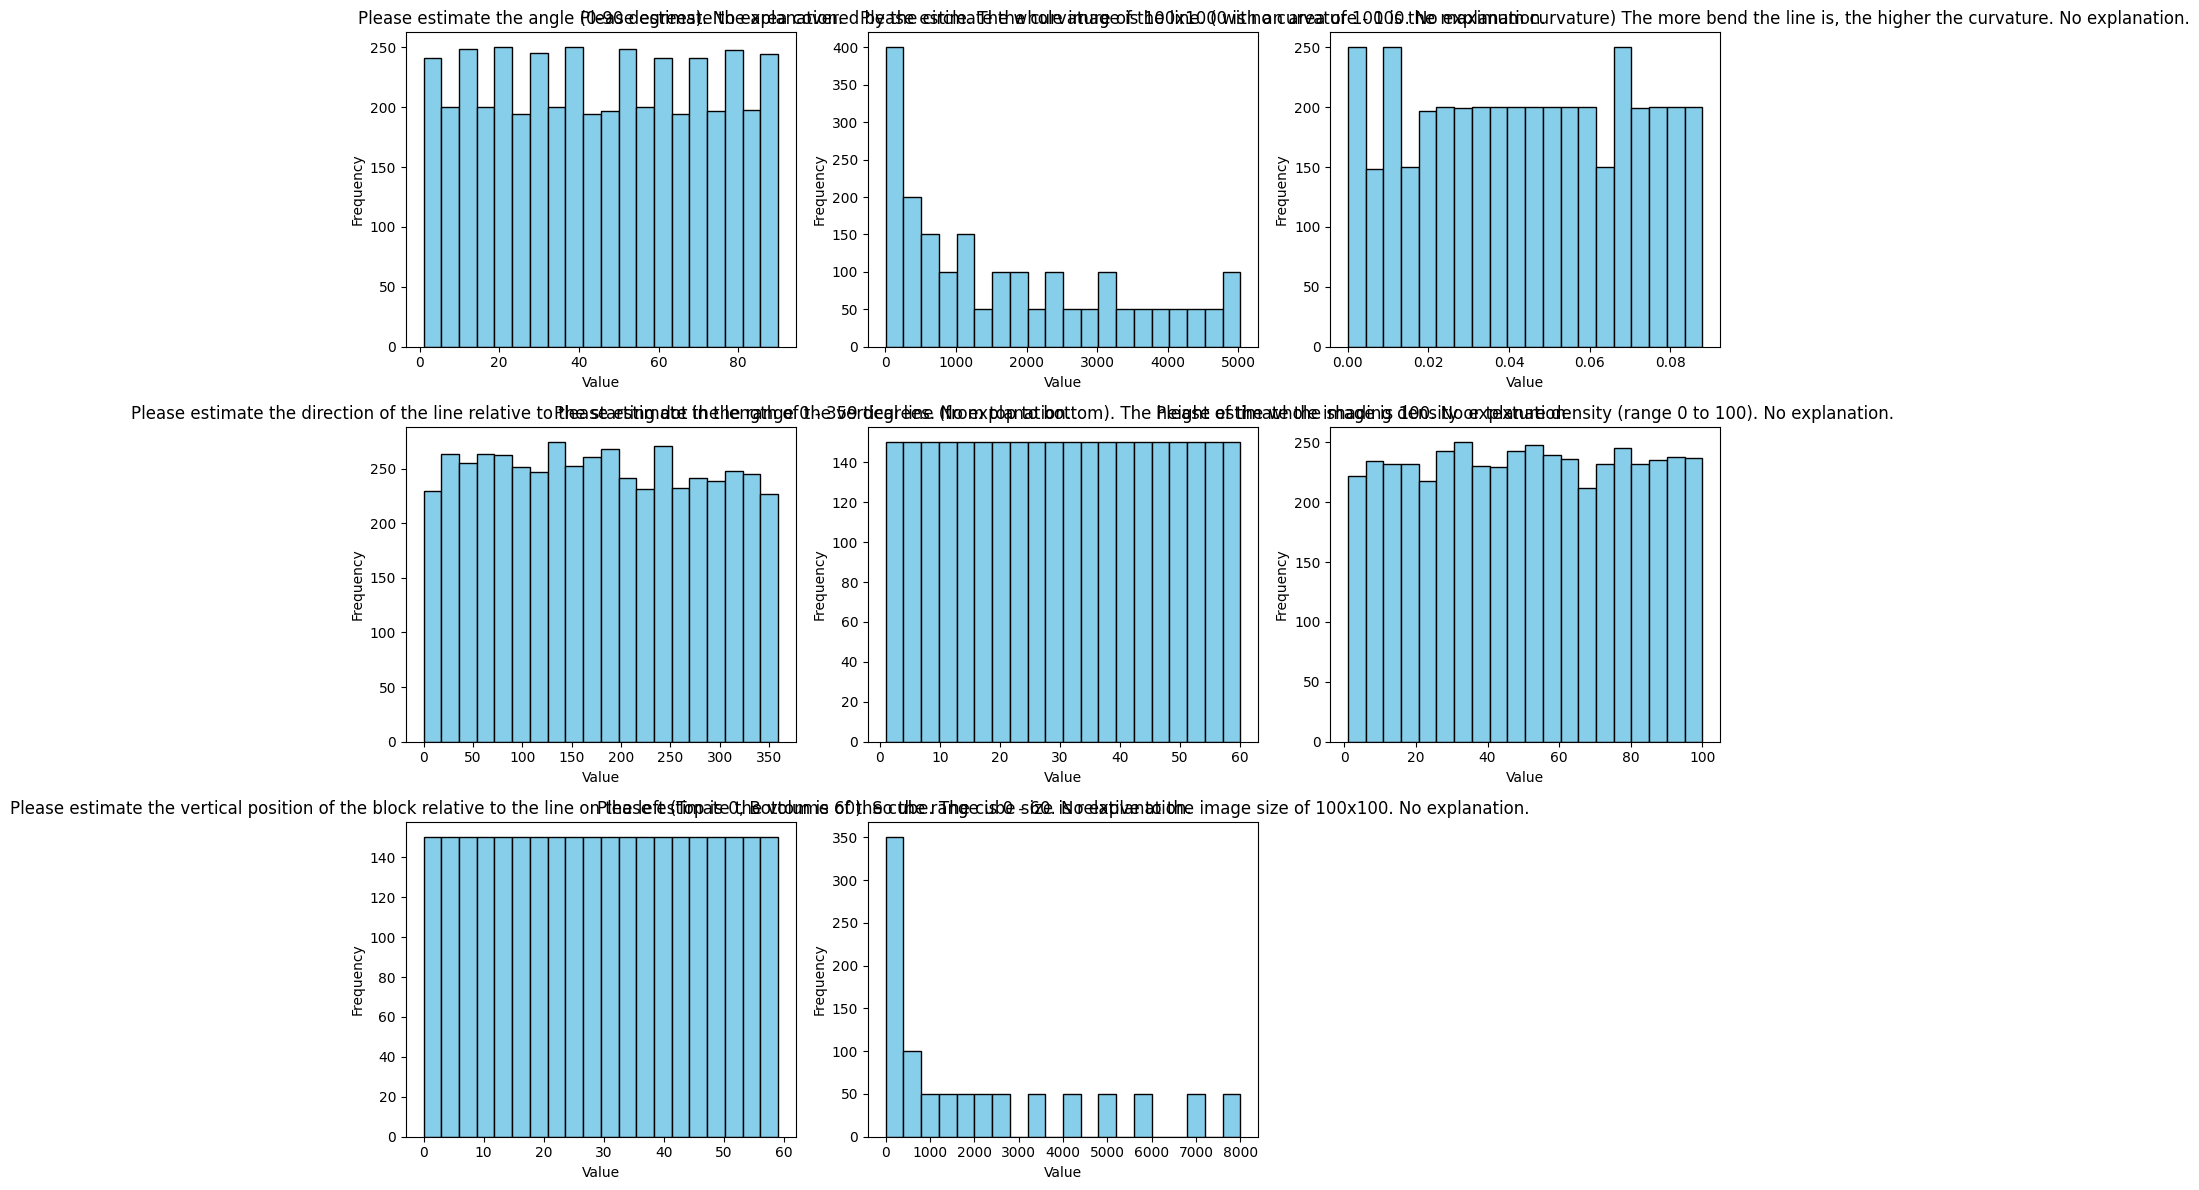

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the JSON file
json_filepath = "output/json/combined_dataset.json"
with open(json_filepath, 'r') as f:
    data = json.load(f)

# Convert JSON data to a DataFrame, excluding 'id' and 'image'
df = pd.DataFrame(data).drop(columns=['id', 'image'])

# Set the desired number of images per label
desired_images_per_label = 50  # Ensuring each label has exactly 50 images

# Create a balanced DataFrame by limiting entries per label
balanced_df = (
    df.groupby(['question', 'value'])
    .apply(lambda x: x.sample(n=desired_images_per_label, replace=False) if len(x) >= desired_images_per_label else x)
    .reset_index(drop=True)
)

# Print the balanced DataFrame to verify equal distribution
print(balanced_df)

# Plot distribution for each question to verify equal distribution
questions = balanced_df['question'].unique()
plt.figure(figsize=(14, 12))

for i, question in enumerate(questions, start=1):
    plt.subplot(3, 3, i)
    subset = balanced_df[balanced_df['question'] == question]
    plt.hist(subset['value'], bins=20, color='skyblue', edgecolor='black')
    plt.title(question)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
